In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [281]:
retail_data=pd.read_csv('Online Retail.csv',engine='python')

In [285]:
retail_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [277]:
retail_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [286]:
#remove missing values in CustomerID
retail_data=retail_data.dropna(subset=['CustomerID','Description'])

In [287]:
#Calculate Revenue
retail_data['Revenue']= retail_data['Quantity']*retail_data['UnitPrice']

In [288]:
len(retail_data)

406829

In [43]:
np.unique(retail_data['InvoiceNo'])

array(['536365', '536366', '536367', ..., 'C581499', 'C581568', 'C581569'],
      dtype=object)

In [160]:
retail_data['InvoiceNo'].str.contains("C").value_counts()

False    397924
True       8905
Name: InvoiceNo, dtype: int64

In [161]:
#remove Cancelled Transactions
retail_data=retail_data[~retail_data['InvoiceNo'].str.contains("C")]

In [65]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [66]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [137]:
retail_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
Revenue        float64
dtype: object

In [136]:
retail_data['CustomerID']=retail_data['CustomerID'].astype(np.int64)

In [162]:
#Identify top 15 selling product

top_selling_product=retail_data[['StockCode','Revenue']].groupby('StockCode').sum()
top_selling_product=top_selling_product.sort_values('Revenue',ascending=False).head(15).reset_index()

Text(0.5, 1.0, 'Top 15 Selling Items by Revenue')

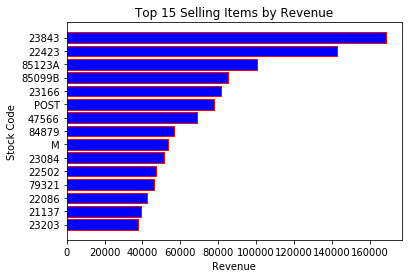

In [163]:
top_selling_product=top_selling_product.sort_values('Revenue', ascending=True)
ax=plt.barh(top_selling_product['StockCode'],top_selling_product['Revenue'],color='blue',edgecolor ='red')
plt.xlabel('Revenue')
plt.ylabel('Stock Code')
plt.title('Top 15 Selling Items by Revenue')

In [207]:
# top Customers for 15 products
all_customers=retail_data[['CustomerID','Revenue']].groupby('CustomerID').sum()
top_customers=all_customers.sort_values('Revenue',ascending=False).head(15).reset_index()
top_customers=top_customers.sort_values('Revenue', ascending=True)




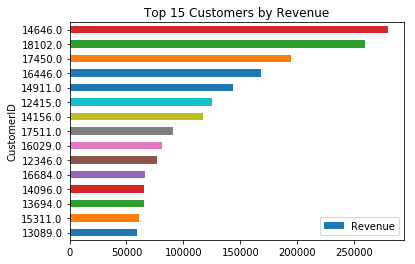

In [210]:
top_customers.plot.barh(x='CustomerID', y='Revenue',title ='Top 15 Customers by Revenue')


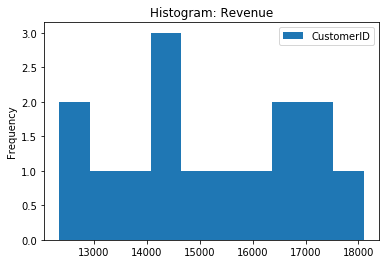

In [206]:
top_customers.plot.hist(x='Revenue',title ='Histogram: Revenue')


In [223]:
all_customers=all_customers.reset_index(drop=True)
all_customers['quantile_ex_1'] = pd.cut(all_customers['Revenue'], 10)
all_customers['quantile_ex_1'].value_counts()

(-280.206, 28020.602]       4304
(28020.602, 56041.204]        18
(56041.204, 84061.806]         9
(252185.418, 280206.02]        2
(168123.612, 196144.214]       2
(112082.408, 140103.01]        2
(140103.01, 168123.612]        1
(84061.806, 112082.408]        1
(224164.816, 252185.418]       0
(196144.214, 224164.816]       0
Name: quantile_ex_1, dtype: int64

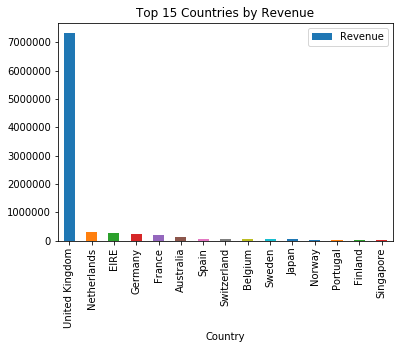

In [228]:
# top countries by revenue
all_countries=retail_data[['Country','Revenue']].groupby('Country').sum()
top_country=all_countries.sort_values('Revenue',ascending=False).head(15).reset_index()
#top_country=top_country.sort_values('Revenue', ascending=True)
top_country.plot.bar(x='Country', y='Revenue',title ='Top 15 Countries by Revenue')

In [261]:
# use groupby to aggregate sales by CustomerID
customer_df = retail_data.groupby('CustomerID').agg({'Revenue': sum, 
                                            'InvoiceNo': lambda x: x.nunique()})

# Select the columns we want to use
customer_df.columns = ['TotalRevenue', 'OrderCount'] 

# create a new column 'AvgOrderValu'
customer_df['AvgOrderValue'] = customer_df['TotalRevenue'] / customer_df['OrderCount']

customer_df.head()

,TotalRevenue,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [262]:
# Data Normalization

rank_df = customer_df.rank(method='first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(10)


,TotalRevenue,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724268,-1.731452,1.730654
12347.0,1.464031,1.173460,1.319544
12348.0,0.929189,0.533246,0.938768
12349.0,0.906837,-1.730654,1.681161
12350.0,-0.750376,-1.729856,0.336073
12352.0,1.171863,1.287613,0.171628
12353.0,-1.638853,-1.729057,-1.571798
12354.0,0.486946,-1.728259,1.610115
12355.0,-0.407119,-1.727461,0.977085


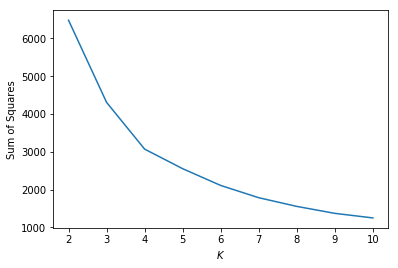

In [264]:
from sklearn import cluster
import numpy as np

sse = []
krange = list(range(2,11))
X = normalized_df[['TotalRevenue','OrderCount','AvgOrderValue']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

plt.plot(krange, sse)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

In [ ]:
## 4 Clusters ideal

In [266]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalRevenue', 'OrderCount', 'AvgOrderValue']])

four_cluster_df = normalized_df[['TotalRevenue', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

four_cluster_df.head(10)

,TotalRevenue,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724268,-1.731452,1.730654,2
12347.0,1.464031,1.173460,1.319544,1
12348.0,0.929189,0.533246,0.938768,1
12349.0,0.906837,-1.730654,1.681161,2
12350.0,-0.750376,-1.729856,0.336073,2
12352.0,1.171863,1.287613,0.171628,1
12353.0,-1.638853,-1.729057,-1.571798,0
12354.0,0.486946,-1.728259,1.610115,2
12355.0,-0.407119,-1.727461,0.977085,2


In [267]:
cluster1_metrics = kmeans.cluster_centers_[0]
cluster2_metrics = kmeans.cluster_centers_[1]
cluster3_metrics = kmeans.cluster_centers_[2]
cluster4_metrics = kmeans.cluster_centers_[3]

data = [cluster1_metrics, cluster2_metrics, cluster3_metrics, cluster4_metrics]
cluster_center_df = pd.DataFrame(data)

cluster_center_df.columns = four_cluster_df.columns[0:3]
cluster_center_df

,TotalRevenue,OrderCount,AvgOrderValue
0,-1.239903,-0.804878,-1.056761
1,1.199995,1.004880,0.857590
2,-0.140582,-0.855464,0.801489
3,0.207740,0.708975,-0.646037


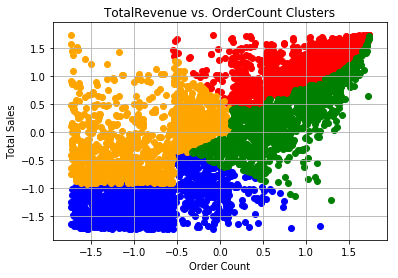

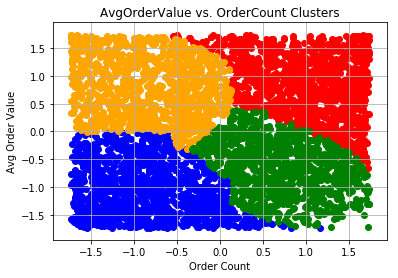

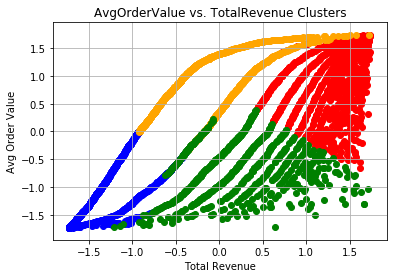

In [268]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalRevenue'],
    c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalRevenue'],
    c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalRevenue'],
    c='orange')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalRevenue'],
    c='green')

plt.title('TotalRevenue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green')

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalRevenue'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalRevenue'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalRevenue'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalRevenue'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green')

plt.title('AvgOrderValue vs. TotalRevenue Clusters')
plt.xlabel('Total Revenue')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

In [273]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 1]

pd.DataFrame(retail_data.loc[retail_data['CustomerID'].isin(high_value_cluster.index)].groupby(
    'Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1191
WHITE HANGING HEART T-LIGHT HOLDER,1126
REGENCY CAKESTAND 3 TIER,1111
LUNCH BAG RED RETROSPOT,976
PARTY BUNTING,886
